In [1]:
import tabular_data
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
file = 'clean_tabular_data.csv'
df = pd.read_csv(file)


In [4]:
def load_airbnb(df):
    
    df = df.drop(columns=["Unnamed: 19"])
   

    features = df.drop(columns=['Price_Night', 'ID', 'Category', 'Title', 'Description', 'Amenities', 'Location', 'url'])
   
    labels = df["Price_Night"]

    features_labels  = (features, labels)
    return features_labels    

In [5]:
X,y=load_airbnb(df)
X.shape

(830, 12)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5)

In [19]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [20]:
from sklearn.linear_model import SGDRegressor


In [21]:
model=SGDRegressor()

In [22]:
model.fit(X_train,y_train)

SGDRegressor()

In [23]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_validation_pred = model.predict(X_validation)

C:\Users\admin\miniconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


In [24]:
#Model Performance: RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
validation_rmse = np.sqrt(mean_squared_error(y_validation, y_validation_pred)) 
print(f"Train RMSE: {train_rmse:.2f} | Validation RMSE: {validation_rmse:.2f} | Test RMSE: {test_rmse:.2f}"   )

Train RMSE: 103.17 | Validation RMSE: 5329.79 | Test RMSE: 83.99


In [25]:
   # Model Performance: R-squared
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)
score_validation = model.score(X_validation, y_validation)
print(f"R-squared; Train: {score_train:.2f} | Validation : {score_validation:.2f} | Test : {score_test:.2f} ")

R-squared; Train: 0.37 | Validation : -1795.74 | Test : 0.56 


C:\Users\admin\miniconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


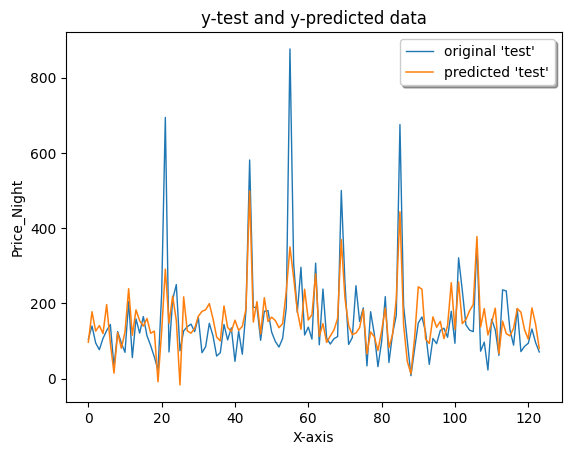

In [26]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original 'test'")
plt.plot(x_ax, y_test_pred, linewidth=1.1, label="predicted 'test'")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Price_Night')
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV

In [58]:
#### Hyperparameter tuning

def tune_regression_model_hyperparameters(model, X_train, y_train, X_test, y_test, X_validation, y_validation, parameter_grid:dict):
    gridsearch=GridSearchCV(estimator=model,
                      param_grid=parameter_grid
                     )
    gridsearch.fit(X_train,y_train)
    bestmodel=gridsearch.best_estimator_
    bestparams=gridsearch.best_params_
    
    y_validation_pred = bestmodel.predict(X_validation)

    validation_rmse = round(np.sqrt(mean_squared_error(y_validation, y_validation_pred)), 2)
    r2_score_validation = bestmodel.score(X_validation, y_validation)
    performance_metric = {'validation_RMSE': validation_rmse}
    performance_metric["r2_score_validation"] = r2_score_validation
    
    return bestmodel, bestparams,performance_metric
   
    
    

    

In [59]:
parameter_grid={
    'power_t': [0.1, 0.2, 0.3, 0.4],
        'eta0': [0.001, 0.01, 0.1],
        'n_iter_no_change': [2, 5, 8, 10, 15],
        'alpha': [0.00001, 0.0001, 0.001, 0.01]
        }

In [60]:
bestmodel, best_params,performance_metric=tune_regression_model_hyperparameters(model, X_train, y_train, X_test, y_test, X_validation, y_validation, parameter_grid)
print(bestmodel, best_params,performance_metric)

C:\Users\admin\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\admin\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\admin\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\admin\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\admin\miniconda3\lib\site-packages\sklearn\

SGDRegressor(alpha=0.01, power_t=0.2) {'alpha': 0.01, 'eta0': 0.01, 'n_iter_no_change': 5, 'power_t': 0.2} {'validation_RMSE': 4911.34, 'r2_score_validation': -1524.687800375241}


C:\Users\admin\miniconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
C:\Users\admin\miniconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


In [50]:
accuracy = gridsearch.best_score_

NameError: name 'gridsearch' is not defined